Code By Reza Heidari for the MLC competition

SUT AI

In [ ]:
import numpy as np
import os
from os import walk
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
from tqdm import tqdm
from numpy.core.fromnumeric import size

In [ ]:
!gdown 1BWP1QtB9iFb9VJxsKZQhWvEzWdSUpsvw

Downloading...
From: https://drive.google.com/uc?id=1BWP1QtB9iFb9VJxsKZQhWvEzWdSUpsvw
To: /content/Copy of Animals_train.zip
100% 1.16G/1.16G [00:09<00:00, 122MB/s] 


In [ ]:
!unzip Animals_train.zip

In [ ]:
print(os.listdir("Data/Animals/train"))
for (dirpath, dirnames, filenames) in walk("Data/Animals/train"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)

['dog', 'cow', 'zebra', 'giraffe', 'horse', 'elephant', 'bird', 'cat']
Directory path:  Data/Animals/train
Folder name:  ['dog', 'cow', 'zebra', 'giraffe', 'horse', 'elephant', 'bird', 'cat']
Directory path:  Data/Animals/train/dog
Folder name:  []
Directory path:  Data/Animals/train/cow
Folder name:  []
Directory path:  Data/Animals/train/zebra
Folder name:  []
Directory path:  Data/Animals/train/giraffe
Folder name:  []
Directory path:  Data/Animals/train/horse
Folder name:  []
Directory path:  Data/Animals/train/elephant
Folder name:  []
Directory path:  Data/Animals/train/bird
Folder name:  []
Directory path:  Data/Animals/train/cat
Folder name:  []


In [ ]:
transform = transforms.Compose([transforms.Resize(225),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                ])
img_dataset = datasets.ImageFolder('Data/Animals/train', transform=transform)
train_size = int(0.8 * len(img_dataset))
cv_size = len(img_dataset) - train_size
train_dataset, cv_dataset = torch.utils.data.random_split(img_dataset, [train_size, cv_size])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
cv_loader = torch.utils.data.DataLoader(cv_dataset, batch_size=32, shuffle=True)

tensor(2)
tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
torch.Size([32, 3, 224, 224])
6384 1597


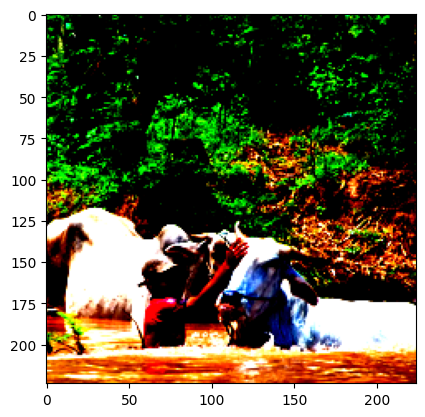

In [ ]:
images, labels = next(iter(train_loader))
plt.imshow(images[0].permute(1, 2, 0))
print(labels[0])
print(F.one_hot(labels[0], 10))
print(images.shape)
print(len(train_dataset), len(cv_dataset))

In [ ]:
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 128),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(128, 128),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(128, 10))

    def forward(self, image_batch):
        x = self.layer1(image_batch)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        x = self.layer8(x)
        x = self.layer9(x)
        x = self.layer10(x)
        x = self.layer11(x)
        x = self.layer12(x)
        x = self.layer13(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
model = models.vgg16_bn(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
# for param in model.features[28].parameters():
#     param.requires_grad = True
# for param in model.features[26].parameters():
#     param.requires_grad = True
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, 10)

for param in model.features[40].parameters():
    param.requires_grad = True
model.classifier[0] = nn.Linear(in_features=25088, out_features=128)
model.classifier[3] = nn.Linear(in_features=128, out_features=128)
model.classifier[-1] = nn.Linear(in_features=128, out_features=10)
model.to(device)
model.train()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:07<00:00, 77.8MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
criterion = nn.CrossEntropyLoss()

# model = ClassificationModel()
# model = model.to(device)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(total_params)
optimizer = optim.Adam(model.parameters())
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
model.train()

5589002


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
def eval_epoch(model):
    model.eval()
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for data in cv_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network : {100 * correct / total} %')
    return correct / total
def train_epoch(model):
    model.train()
#     running_loss = 0.0
    for i, data in enumerate(tqdm(train_loader)):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()



In [ ]:
epochs = 3
for epoch in range(epochs):
    train_epoch(model)
    accuracy = eval_epoch(model)
    if accuracy > 0.91:
        break
print('Finished Training')

100%|██████████| 200/200 [01:09<00:00,  2.89it/s]


Accuracy of the network : 90.67000626174077 %


100%|██████████| 200/200 [01:01<00:00,  3.26it/s]


Accuracy of the network : 89.73074514715091 %


100%|██████████| 200/200 [01:01<00:00,  3.23it/s]


Accuracy of the network : 91.29618033813401 %
Finished Training


In [ ]:
model2 = ClassificationModel()
model2 = model2.to(device)
sdict = model.state_dict().copy()

# sdict['layer1.0.weight'] = sdict.pop('features.0.weight')
# sdict['layer1.0.bias'] = sdict.pop('features.0.bias')

# sdict['layer2.0.weight'] = sdict.pop('features.2.weight')
# sdict['layer2.0.bias'] = sdict.pop('features.2.bias')

# sdict['layer3.0.weight'] = sdict.pop('features.5.weight')
# sdict['layer3.0.bias'] = sdict.pop('features.5.bias')

# sdict['layer4.0.weight'] = sdict.pop('features.7.weight')
# sdict['layer4.0.bias'] = sdict.pop('features.7.bias')

# sdict['layer5.0.weight'] = sdict.pop('features.10.weight')
# sdict['layer5.0.bias'] = sdict.pop('features.10.bias')

# sdict['layer6.0.weight'] = sdict.pop('features.12.weight')
# sdict['layer6.0.bias'] = sdict.pop('features.12.bias')

# sdict['layer7.0.weight'] = sdict.pop('features.14.weight')
# sdict['layer7.0.bias'] = sdict.pop('features.14.bias')

# sdict['layer8.0.weight'] = sdict.pop('features.17.weight')
# sdict['layer8.0.bias'] = sdict.pop('features.17.bias')

# sdict['layer9.0.weight'] = sdict.pop('features.19.weight')
# sdict['layer9.0.bias'] = sdict.pop('features.19.bias')

# sdict['layer10.0.weight'] = sdict.pop('features.21.weight')
# sdict['layer10.0.bias'] = sdict.pop('features.21.bias')

# sdict['layer11.0.weight'] = sdict.pop('features.24.weight')
# sdict['layer11.0.bias'] = sdict.pop('features.24.bias')

# sdict['layer12.0.weight'] = sdict.pop('features.26.weight')
# sdict['layer12.0.bias'] = sdict.pop('features.26.bias')

# sdict['layer13.0.weight'] = sdict.pop('features.28.weight')
# sdict['layer13.0.bias'] = sdict.pop('features.28.bias')

sdict['fc.1.weight'] = sdict.pop('classifier.0.weight')
sdict['fc.1.bias'] = sdict.pop('classifier.0.bias')

sdict['fc1.1.weight'] = sdict.pop('classifier.3.weight')
sdict['fc1.1.bias'] = sdict.pop('classifier.3.bias')

sdict['fc2.0.weight'] = sdict.pop('classifier.6.weight')
sdict['fc2.0.bias'] = sdict.pop('classifier.6.bias')

print(list(sdict))
print(type(sdict))

replace_names = {0:'layer1.0', 1: 'layer1.1', 3:'layer2.0', 4:'layer2.1', 7:'layer3.0', 8:'layer3.1', 10:'layer4.0', 11:'layer4.1', 14:'layer5.0', 15:'layer5.1', 17:'layer6.0', 18:'layer6.1', 20:'layer7.0', 21:'layer7.1', 24:'layer8.0', 25:'layer8.1', 27:'layer9.0', 28:'layer9.1', 30:'layer10.0', 31:'layer10.1', 34:'layer11.0', 35:'layer11.1', 37:'layer12.0', 38:'layer12.1' , 40:'layer13.0', 41:'layer13.1'}

for i in replace_names.keys():
    f_name = 'features.' + str(i) + '.weight'
    b_name = 'features.' + str(i) + '.bias'
    mean_name = 'features.' + str(i) + '.running_mean'
    var_name = 'features.' + str(i) + '.running_var'
    num_batch_name = 'features.' + str(i) + '.num_batches_tracked'
    sdict[replace_names[i] + '.weight'] = sdict.pop(f_name)
    sdict[replace_names[i] + '.bias'] = sdict.pop(b_name)
    if var_name in sdict:
        sdict[replace_names[i] + '.running_mean'] = sdict.pop(mean_name)
        sdict[replace_names[i] + '.running_var'] = sdict.pop(var_name)
        sdict[replace_names[i] + '.num_batches_tracked'] = sdict.pop(num_batch_name)

model2.load_state_dict(sdict,strict=False)
eval_epoch(model)
eval_epoch(model2)

['layer1.0.weight', 'layer1.0.bias', 'layer2.0.weight', 'layer2.0.bias', 'layer3.0.weight', 'layer3.0.bias', 'layer4.0.weight', 'layer4.0.bias', 'layer5.0.weight', 'layer5.0.bias', 'layer6.0.weight', 'layer6.0.bias', 'layer7.0.weight', 'layer7.0.bias', 'layer8.0.weight', 'layer8.0.bias', 'layer9.0.weight', 'layer9.0.bias', 'layer10.0.weight', 'layer10.0.bias', 'layer11.0.weight', 'layer11.0.bias', 'layer12.0.weight', 'layer12.0.bias', 'layer13.0.weight', 'layer13.0.bias', 'fc.1.weight', 'fc.1.bias', 'fc1.1.weight', 'fc1.1.bias', 'fc2.0.weight', 'fc2.0.bias']
<class 'collections.OrderedDict'>
Accuracy of the network : 90.92047589229806 %
Accuracy of the network : 90.92047589229806 %


0.9092047589229806

In [ ]:
torch.save(model2.state_dict(), 'checkpoint.pth')

In [ ]:
!ls -l

total 1203928
-rw-r--r-- 1 root root       1599 Jun 24 12:36  1IZr7DYItUyP9uRHAMSILKTQrmBBcgCJQ
-rw-r--r-- 1 root root 1160763751 Jun 24 12:46  Animals_train.zip
-rw-r--r-- 1 root root   71874731 Jun 24 13:09  checkpoint.pth
drwxr-xr-x 3 root root       4096 Jun 24 12:47  Data
drwxr-xr-x 1 root root       4096 Jun 23 01:15  sample_data
-rw-r--r-- 1 root root      81774 Jun 24 12:28 'view?usp=drive_link'
-rw-r--r-- 1 root root      81737 Jun 24 12:24 'view?usp=sharing'


In [ ]:
class AdversaryModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 3, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(3),
            nn.ReLU())
        # self.load_state_dict(torch.load('adv.pth'))
    def forward(self, model, samples, eps):
        x = self.layer1(samples)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        samples = samples + F.normalize(x - samples, dim = 0) * eps
        return samples

In [ ]:
##adverserial train
adv_model = AdversaryModel()
adv_model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(adv_model.parameters())
epochs = 5
for epoch in range(epochs):
    adv_model.train()
    for i, data in enumerate(tqdm(train_loader)):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = -1 * criterion(outputs, labels)
        loss.backward()
        optimizer.step()

100%|██████████| 200/200 [01:00<00:00,  3.32it/s]


In [ ]:
torch.save(adv_model.state_dict(), 'adv.pth')

In [ ]:
for i, data in enumerate(tqdm(train_loader)):
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = adv_model(model, inputs, 0.01)
    break
